In [1]:
import cvrpy
import numpy as np
import tikzplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

In [46]:
rules = [cvrpy.RandomPair(),
         cvrpy.MaxNashConflict(),
         cvrpy.MaxSumConflict(),
         cvrpy.MaxSwap(),
         cvrpy.MaxPolar(p=2),
         cvrpy.Borda(),
         cvrpy.ChamberlainCourant(),
         ]

rule_names = ['RandomPair',
                'MaxNashConflict',
                'MaxSumConflict',
                'MaxSwapConflict',
                '2-MaxPolar',
                'Borda',
                'CC',
                ]


uniform_generator = cvrpy.UniformPositionsGenerator(dimensions=2)
gaussian_generator = cvrpy.GaussianPositionsGenerator(dimensions=2, sigma=0.15)

rankings_politic = np.loadtxt(f'datasets/french_presidential_2017_rankings.csv', delimiter=',')
weights_politic = np.loadtxt(f'datasets/french_presidential_2017_weights.csv', delimiter=',')
rankings_sushi = np.loadtxt(f'datasets/sushis_rankings.csv', delimiter=',')
rankings_skate = [np.loadtxt(f'datasets/skate_{i}_rankings.csv', delimiter=',') for i in range(1, 49)]

distributions = [cvrpy.MetricGenerator(uniform_generator, uniform_generator),
                cvrpy.MetricGenerator(gaussian_generator, gaussian_generator),
                cvrpy.MetricGenerator(gaussian_generator, uniform_generator),
                cvrpy.MallowsGenerator(2, phi=0.1),
                cvrpy.MallowsGenerator(2, phi=0.25),
                cvrpy.MallowsGenerator(2, phi=0.4),
                cvrpy.SamplingDatasetGenerator(rankings_politic, weights_politic),
                cvrpy.SamplingDatasetGenerator(rankings_sushi),
                cvrpy.SamplingDatasetsGenerator(rankings_skate),
                ]

distribution_names = ['Metric Uniform', 'Metric Gaussian', 'Metric Uni+Gauss',
                        r'Mallows ($\psi=0.1$)', r'Mallows ($\psi=0.25$)', r'Mallows ($\psi=0.4$)',
                        'Politics', 'Sushi', 'Skate']
                      
                 

In [20]:
n_voters = 100
n_candidates = 10
n_iterations = 1000

results = np.zeros((len(distributions), len(rules), n_iterations, 6))

for i, distribution in enumerate(distributions):
    for j in tqdm(range(n_iterations)):
        rankings = distribution(n_voters, n_candidates)
        for k, rule in enumerate(rules):
            rule(rankings)
            [x,y] = rule.selected_pair()
            alpha = cvrpy.getAlpha(rankings, x, y)
            beta = cvrpy.getBeta(rankings, x, y)
            gamma = cvrpy.getGamma(rankings, x, y)
            imbalance = 1-cvrpy.getImbalance(rankings, x, y)
            results[i, k, j, :] = [x, y, alpha, beta, gamma, imbalance]
        

# Save results
np.save('data_out/results.npy', results)


 21%|██        | 207/1000 [00:07<00:29, 27.21it/s]c:\Users\teoz0\Documents\Thèse\2024-01\code-conflict\cvrpy\preferences.py:52: RuntimeWarning: invalid value encountered in scalar divide
  return abs(x_a_b - x_b_a)/(x_a_b + x_b_a)
100%|██████████| 1000/1000 [00:36<00:00, 27.40it/s]


In [21]:
# Load results
results = np.load('data_out/results.npy')

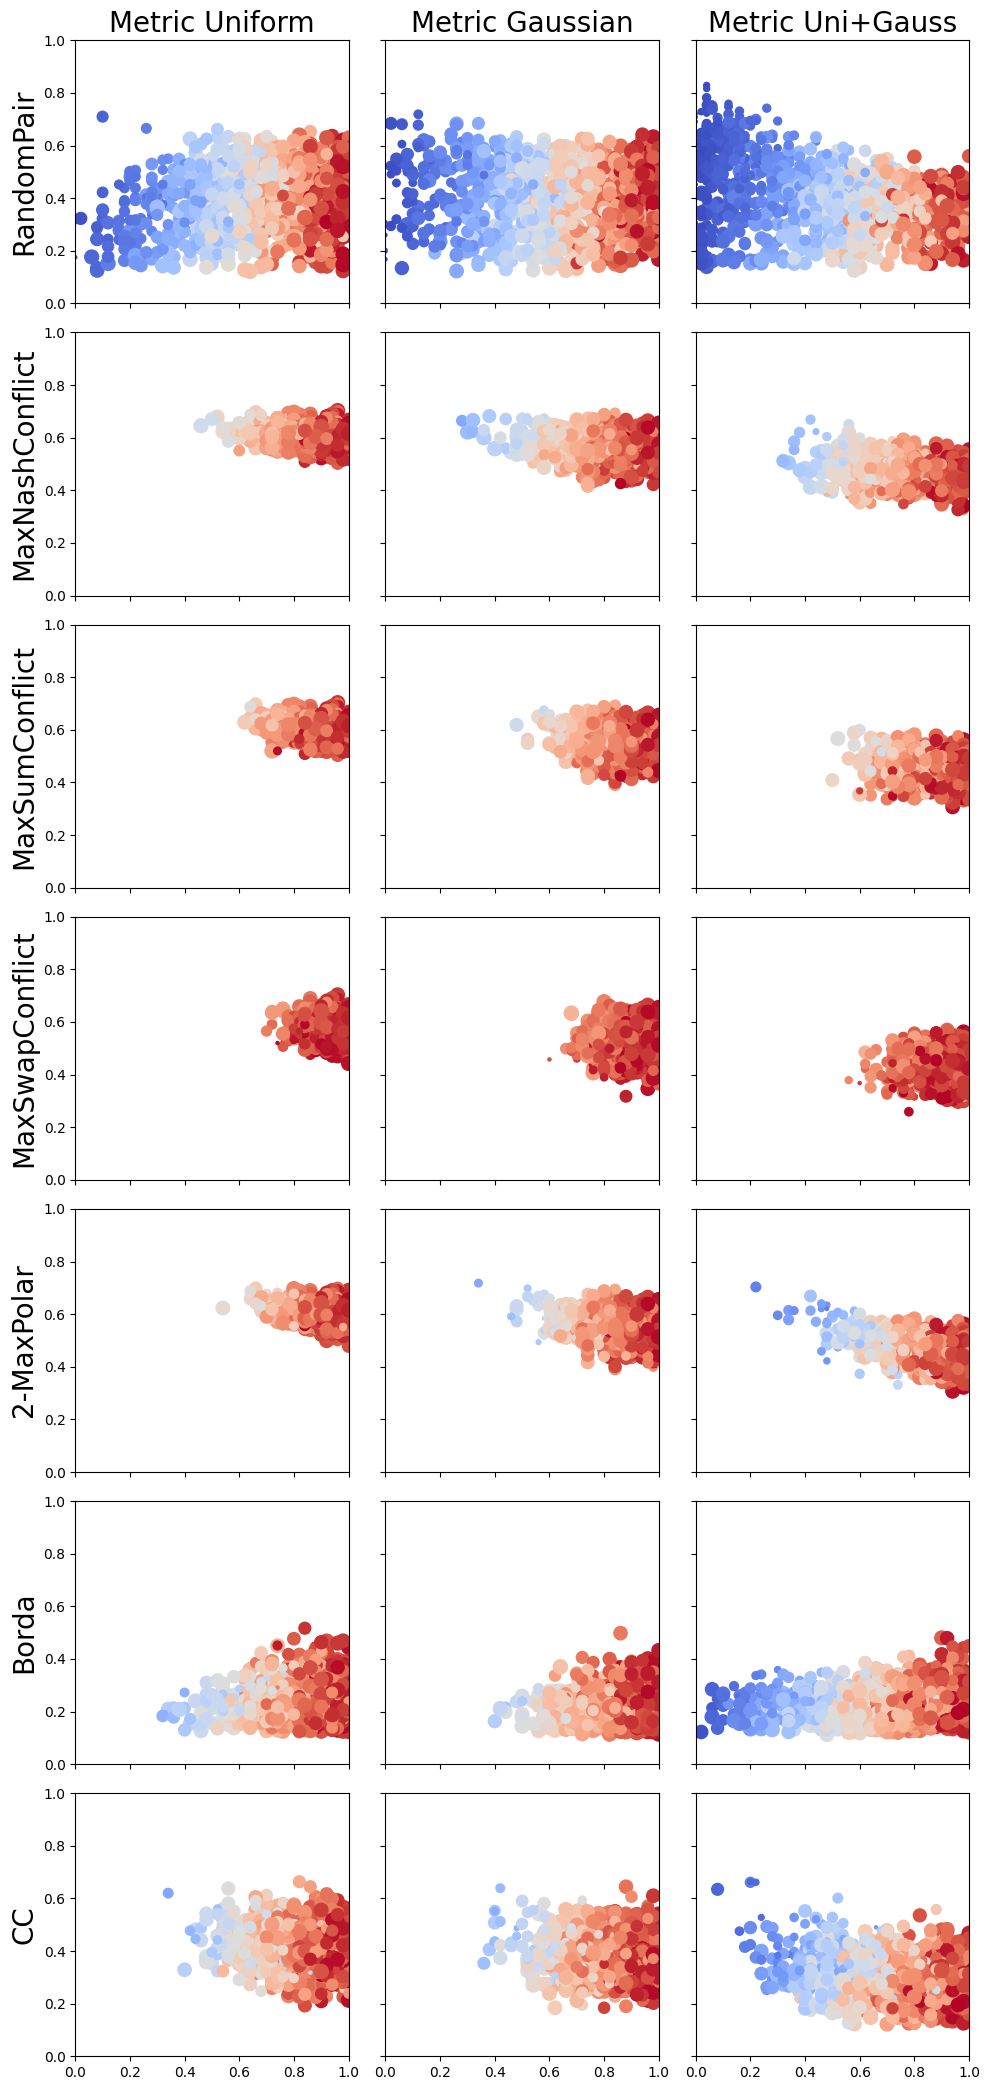

In [47]:
# All rules but only the first 3 distributions

fig, axs = plt.subplots(len(rules), 3, figsize=(10, 3*len(rules)))

for i, rule in enumerate(rules):
    for j, distribution in enumerate(distributions[:3]):
        metrics = results[j,i,:,2:]
        ind_i = i
        ind_j = j
        ax = axs[ind_i,ind_j]
        cs = ax.scatter(metrics[:,0], metrics[:,1], c=metrics[:,3], vmin=0, vmax=1,
            s=(metrics[:,2]-min(metrics[:,2]))/(max(metrics[:,2])-min(metrics[:,2]))*100+5, cmap='coolwarm')
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        if ind_j==0:
            ax.set_ylabel(rule_names[i], fontsize=20)
            
        else:
            ax.set_yticklabels([])
        if ind_i==0:
            ax.set_title(distribution_names[j], fontsize=20)
            
        if ind_i<len(rules)-1:
            ax.set_xticklabels([])

fig.tight_layout()

plt.savefig('figures/results_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

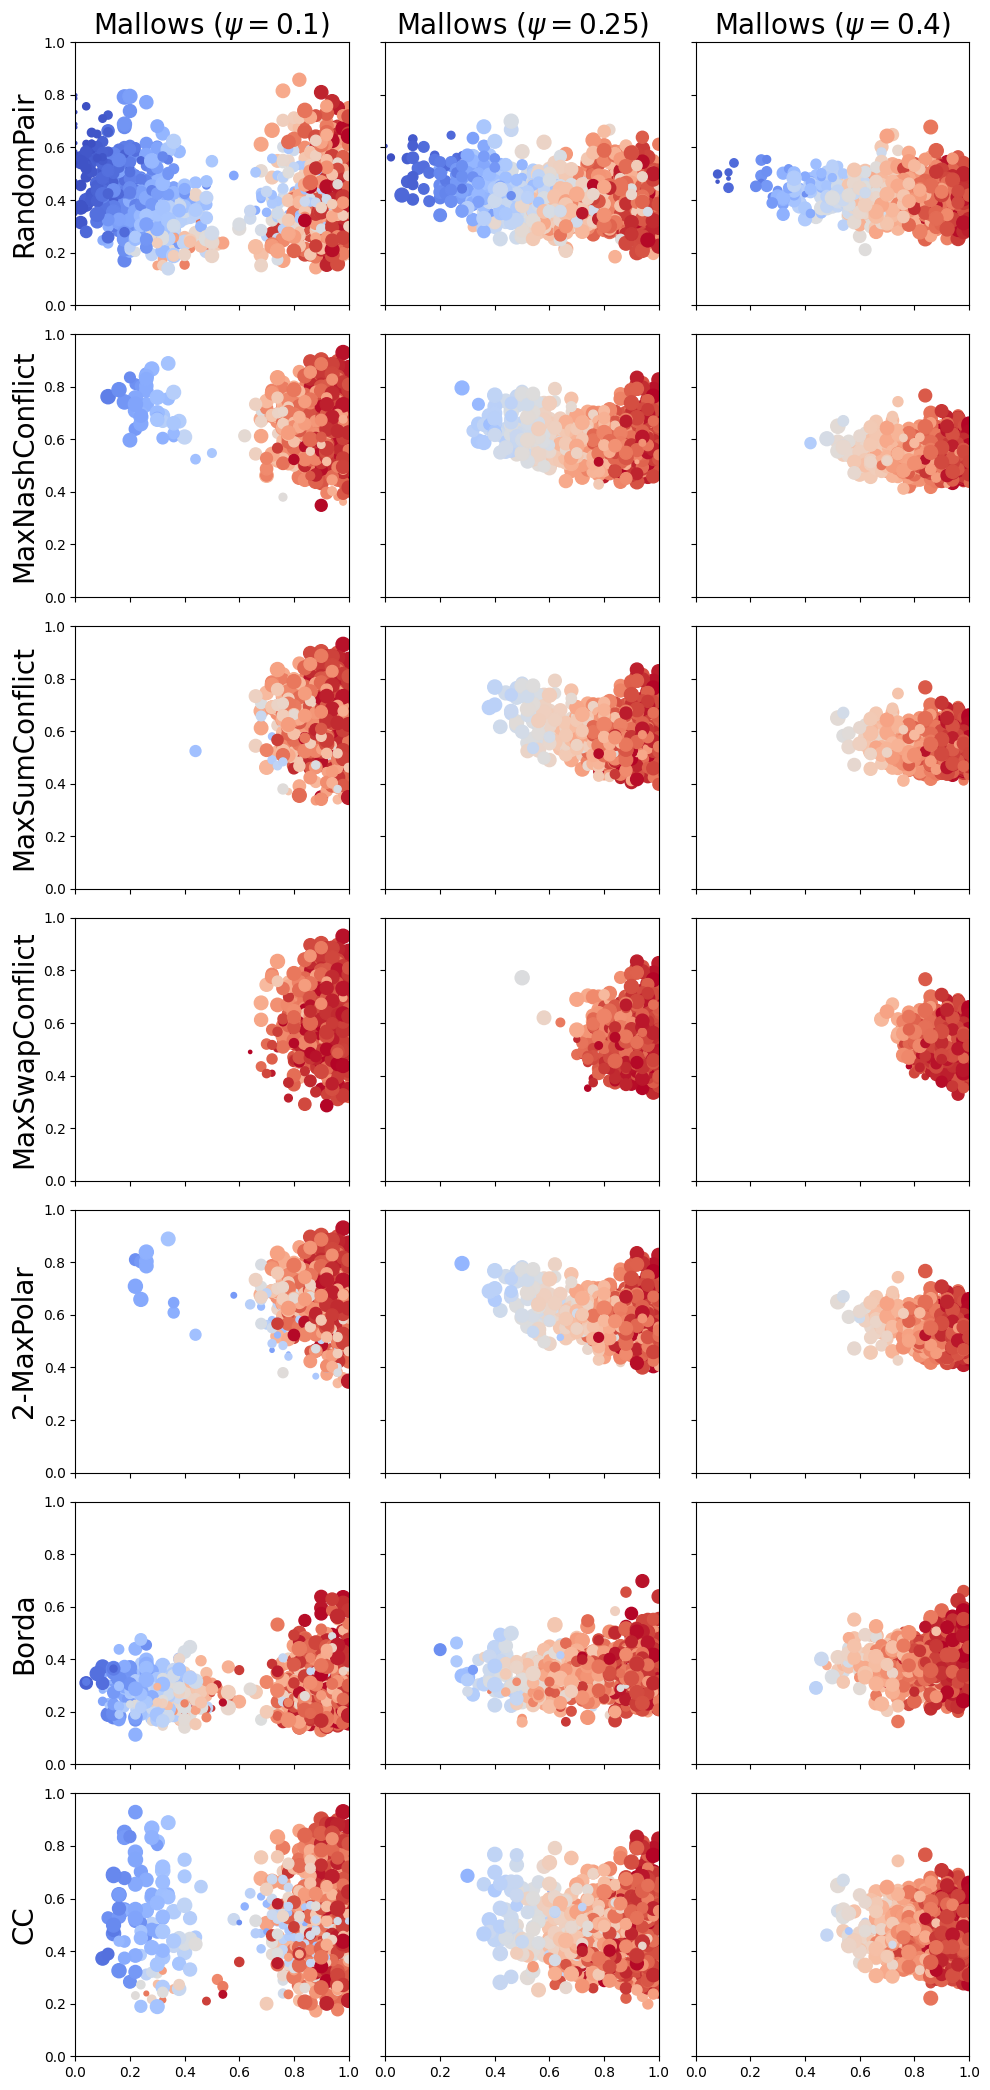

In [48]:
# All rules but only the first 3 distributions

fig, axs = plt.subplots(len(rules), 3, figsize=(10, 3*len(rules)))

for i, rule in enumerate(rules):
    for j, distribution in enumerate(distributions[3:6]):
        metrics = results[j+3,i,:,2:]
        ind_i = i
        ind_j = j
        ax = axs[ind_i,ind_j]
        cs = ax.scatter(metrics[:,0], metrics[:,1], c=metrics[:,3], vmin=0, vmax=1,
            s=(metrics[:,2]-min(metrics[:,2]))/(max(metrics[:,2])-min(metrics[:,2]))*100+5, cmap='coolwarm')
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        if ind_j==0:
            ax.set_ylabel(rule_names[i], fontsize=20)
            
        else:
            ax.set_yticklabels([])
        if ind_i==0:
            ax.set_title(distribution_names[j+3], fontsize=20)
            
        if ind_i<len(rules)-1:
            ax.set_xticklabels([])

fig.tight_layout()
plt.savefig('figures/results_mallows.png', dpi=300, bbox_inches='tight')
        
plt.show()

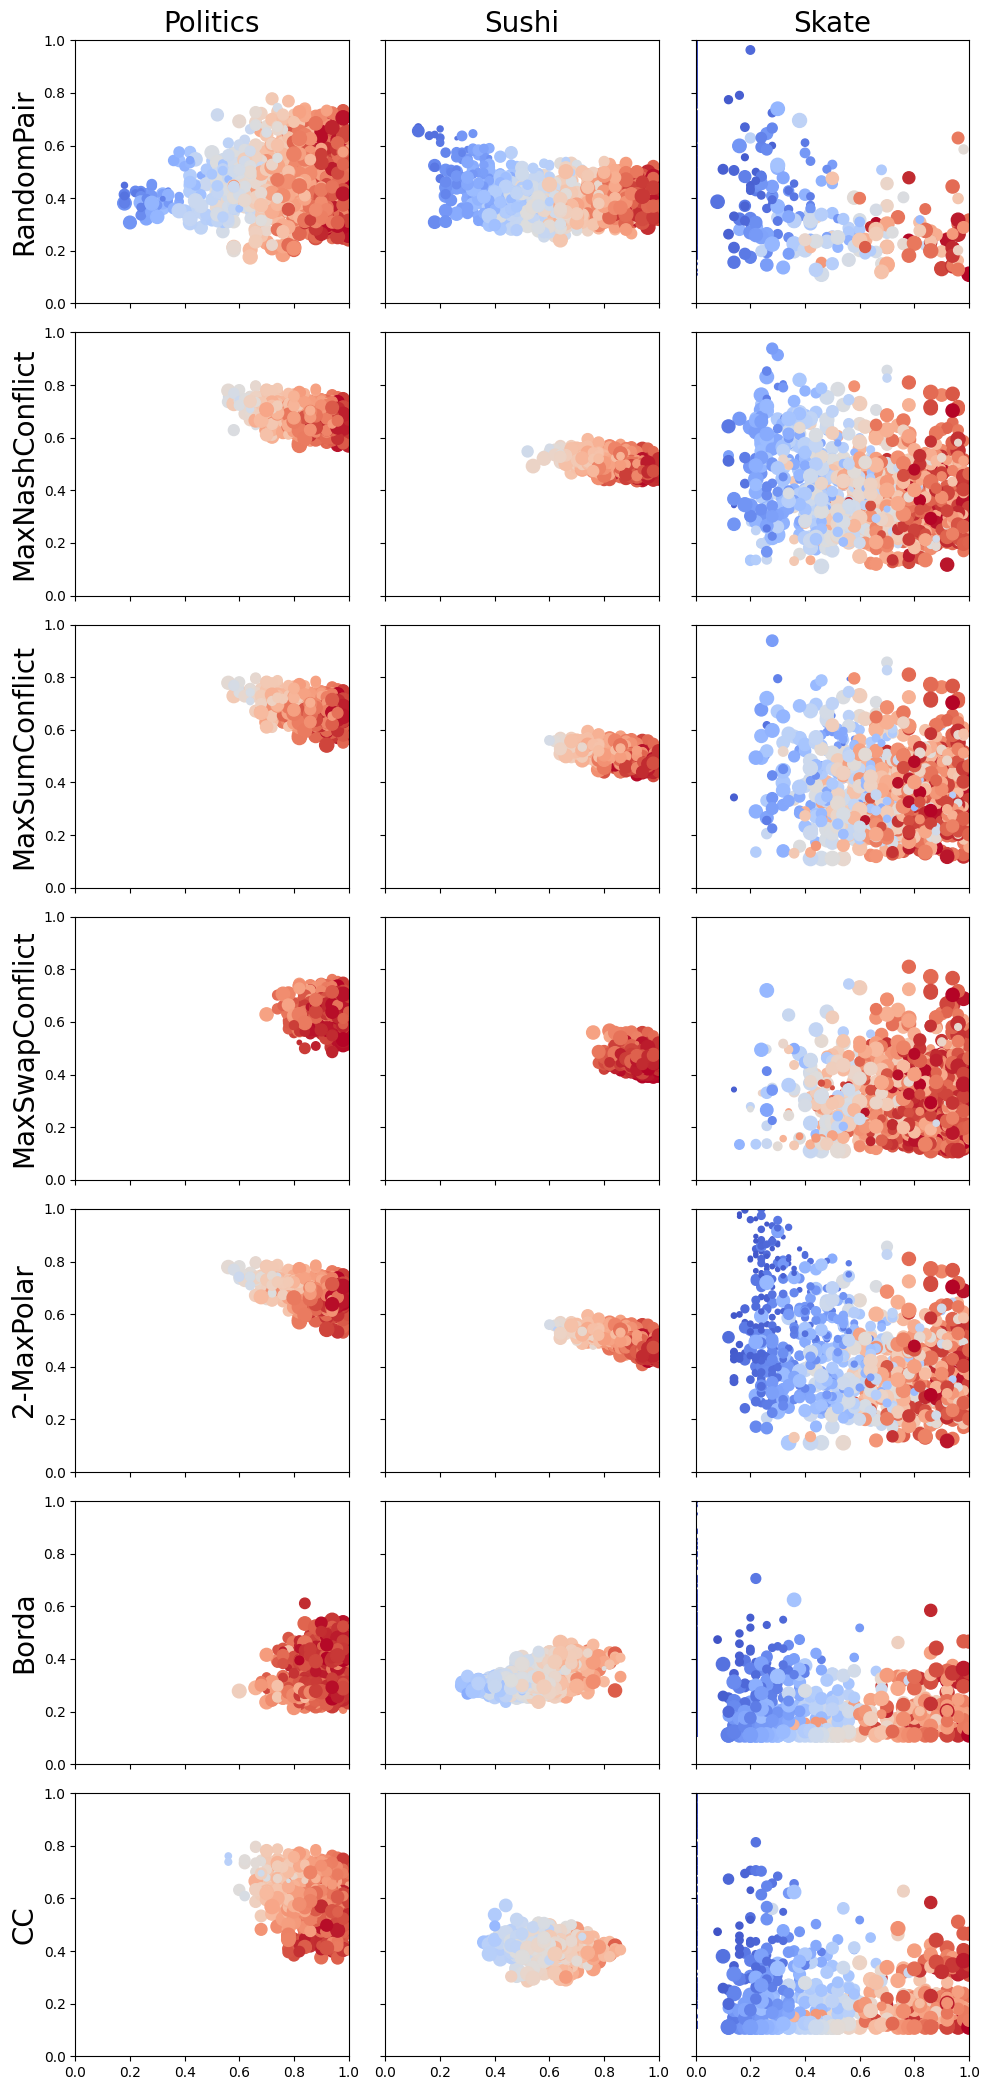

In [49]:
# All rules but only the first 3 distributions

fig, axs = plt.subplots(len(rules), 3, figsize=(10, 3*len(rules)))

for i, rule in enumerate(rules):
    for j, distribution in enumerate(distributions[6:]):
        metrics = results[j+6,i,:,2:]
        ind_i = i
        ind_j = j
        ax = axs[ind_i,ind_j]
        cs = ax.scatter(metrics[:,0], metrics[:,1], c=metrics[:,3], vmin=0, vmax=1,
            s=(metrics[:,2]-min(metrics[:,2]))/(max(metrics[:,2])-min(metrics[:,2]))*100+5, cmap='coolwarm')
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        if ind_j==0:
            ax.set_ylabel(rule_names[i], fontsize=20)
            
        else:
            ax.set_yticklabels([])
        if ind_i==0:
            ax.set_title(distribution_names[j+6], fontsize=20)
            
        if ind_i<len(rules)-1:
            ax.set_xticklabels([])

fig.tight_layout()
        
plt.savefig('figures/results_real.png', dpi=300, bbox_inches='tight')
plt.show()

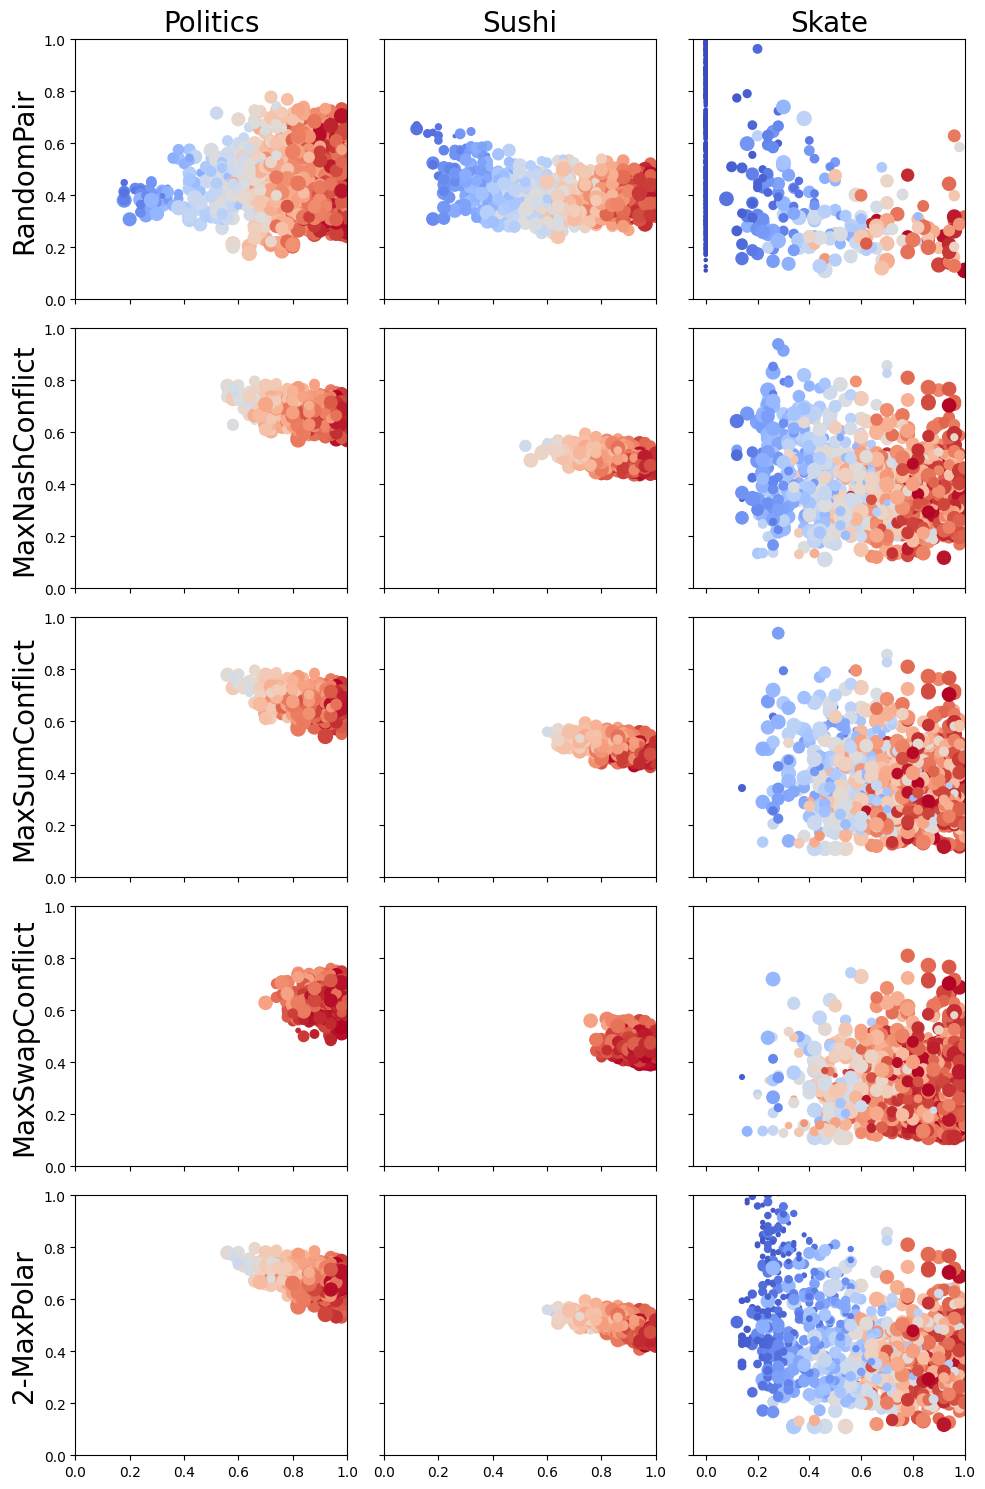

In [50]:
# All rules but only the first 3 distributions

fig, axs = plt.subplots(5, 3, figsize=(10,15))

for x_i in range(5):
    i = x_i
    for j, distribution in enumerate(distributions[6:]):
        metrics = results[j+6,x_i,:,2:]
        ind_i = i 
        ind_j = j
        ax = axs[ind_i,ind_j]
        cs = ax.scatter(metrics[:,0], metrics[:,1], c=metrics[:,3], vmin=0, vmax=1,
            s=(metrics[:,2]-min(metrics[:,2]))/(max(metrics[:,2])-min(metrics[:,2]))*100+5, cmap='coolwarm')
        
        if ind_j%3==2:
            ax.set_xlim(-0.05,1)
        else:
            ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        # axs[i,j].set_xlabel('alpha')


        if ind_j%3==0:
            #label on the right side of the plot
            ax.set_ylabel(rule_names[x_i], fontsize=20)#, rotation=270, labelpad=20)
        else:
            ax.set_yticklabels([])
            # ax.yaxis.set_label_position("right")
        # if ind_j%3==0:
        #     ax.set_ylabel(r'', fontsize=15)
        if ind_i==0:
            ax.set_title(distribution_names[j+6], fontsize=20)
        
        if ind_i<4:
            ax.set_xticklabels([])


fig.tight_layout()
        
plt.savefig('figures/results_real_small.png', dpi=300, bbox_inches='tight')
plt.show()

In [51]:

# color interpolation function

def interpolate(x, y, d):
    val_x = hex2rgb(x)
    val_y = hex2rgb(y)
    val = []
    for i in range(3):
        val.append(int(val_x[i] + (val_y[i] - val_x[i]) * d))

    return rgb2hex(val)

def hex2rgb(hex):
    hex = hex.lstrip('#')
    hlen = len(hex)
    return tuple(int(hex[i:i+hlen//3], 16) for i in range(0, hlen, hlen//3))

def rgb2hex(rgb):
    return '#%02x%02x%02x' % tuple(rgb)



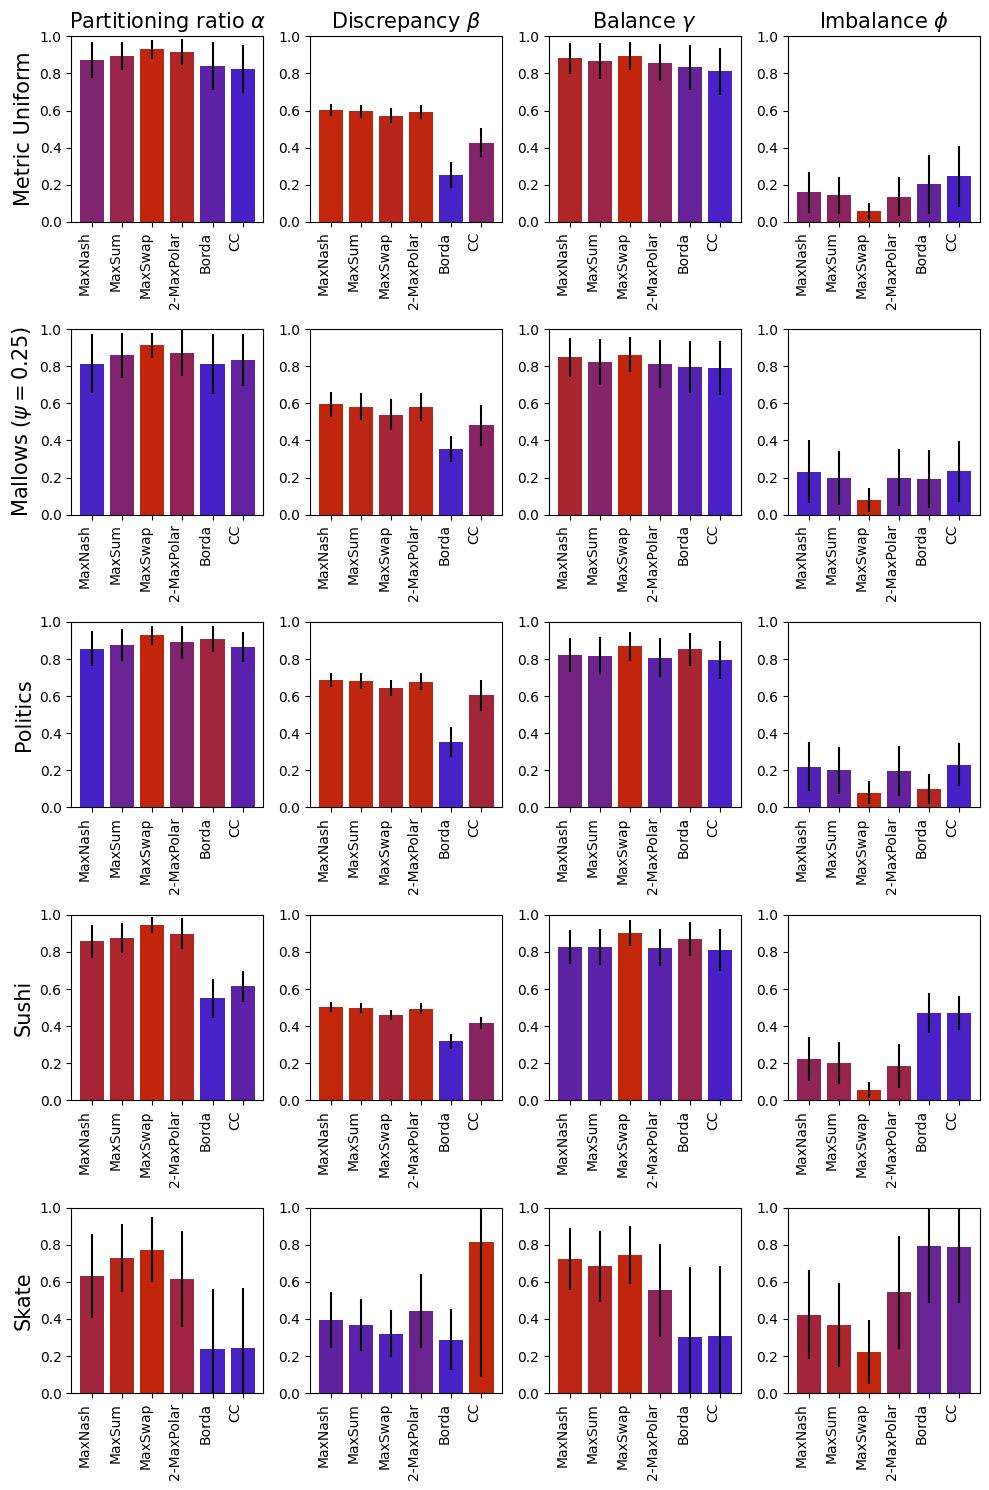

In [52]:
# Compare average metrics for each rule


rule_names_short = ['Random',
                'MaxNash',
                'MaxSum',
                'MaxSwap',
                '2-MaxPolar',
                'Borda',
                'CC',
                ]
fig, axs = plt.subplots( 5, 4, figsize=(4*2.5,3*5,))

for ind_i,i in enumerate([0,4,6,7,8]):
    metrics_distrib = results[i]
    metrics_mean = np.mean(metrics_distrib, axis=1)
    # replace nan by 0
    metrics_mean = np.nan_to_num(metrics_mean)
    metrics_mean = metrics_mean[1:,2:]
    for j in range(1,len(rules)):
        metrics = results[i,j,:,2:]
        metrics = np.nan_to_num(metrics)
        axs[ind_i,0].bar(j, np.mean(metrics[:,0]), yerr=np.std(metrics[:,0]), 
                     color=interpolate('#4822C7', '#C2270C',(np.mean(metrics[:,0])-np.min(metrics_mean[:,0]))/(np.max(metrics_mean[:,0])-np.min(metrics_mean[:,0]))))
        axs[ind_i,1].bar(j, np.mean(metrics[:,1]), yerr=np.std(metrics[:,1]),
                        color=interpolate('#4822C7', '#C2270C',(np.mean(metrics[:,1])-np.min(metrics_mean[:,1]))/(np.max(metrics_mean[:,1])-np.min(metrics_mean[:,1]))))
        axs[ind_i,2].bar(j, np.mean(metrics[:,2]), yerr=np.std(metrics[:,2]),
                        color=interpolate('#4822C7', '#C2270C',(np.mean(metrics[:,2])-np.min(metrics_mean[:,2]))/(np.max(metrics_mean[:,2])-np.min(metrics_mean[:,2]))))
        axs[ind_i,3].bar(j, np.mean(1-metrics[:,3]), yerr=np.std(1-metrics[:,3]),
                        color=interpolate('#4822C7', '#C2270C',(np.mean(metrics[:,3])-np.min(metrics_mean[:,3]))/(np.max(metrics_mean[:,3])-np.min(metrics_mean[:,3]))))

    axs[ind_i,0].set_ylim(0,1)
    axs[ind_i,1].set_ylim(0,1)
    axs[ind_i,2].set_ylim(0,1)
    axs[ind_i,3].set_ylim(0,1)
    axs[ind_i,0].set_ylabel(distribution_names[i], fontsize=15)
    axs[ind_i,0].set_xticks(range(1,len(rules)))
    axs[ind_i,1].set_xticks(range(1,len(rules)))
    axs[ind_i,2].set_xticks(range(1,len(rules)))
    axs[ind_i,3].set_xticks(range(1,len(rules)))
    axs[ind_i,0].set_xticklabels(rule_names_short[1:], rotation=90, ha='right')
    axs[ind_i,1].set_xticklabels(rule_names_short[1:], rotation=90, ha='right')
    axs[ind_i,2].set_xticklabels(rule_names_short[1:], rotation=90, ha='right')
    axs[ind_i,3].set_xticklabels(rule_names_short[1:], rotation=90, ha='right')
    if ind_i==0:
        axs[ind_i,0].set_title(r'Partitioning ratio $\alpha$', fontsize=15)
        axs[ind_i,1].set_title(r'Discrepancy $\beta$', fontsize=15)
        axs[ind_i,2].set_title(r'Balance $\gamma$', fontsize=15)
        axs[ind_i,3].set_title(r"Imbalance $\phi$", fontsize=15)

fig.tight_layout()
plt.savefig('figures/results_mean.png', dpi=300, bbox_inches='tight')
plt.show()

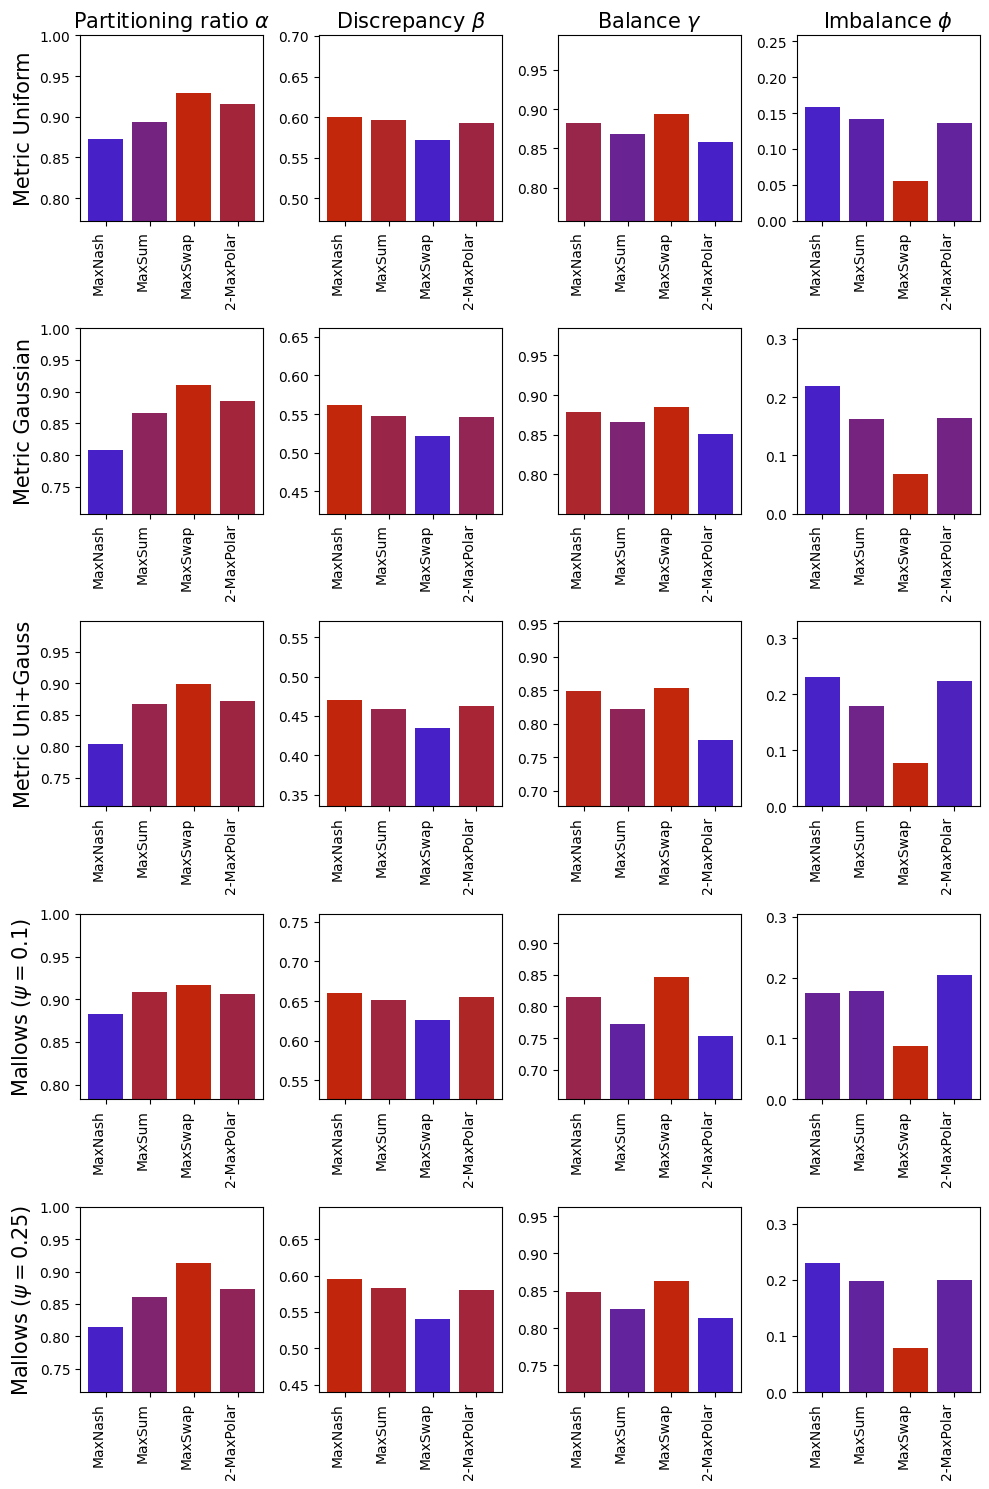

In [53]:
# Compare average metrics for each rule

fig, axs = plt.subplots( 5, 4, figsize=(4*2.5,3*5,))

for ind_i in range(5):
    i = ind_i
    metrics_distrib = results[i]
    metrics_mean = np.mean(metrics_distrib, axis=1)
    metrics_mean = metrics_mean[1:-2,2:]
    for j in range(1,len(rules)-2):
        metrics = results[i,j,:,2:]
        axs[ind_i,0].bar(j, np.mean(metrics[:,0]), #yerr=np.std(metrics[:,0]), 
                     color=interpolate('#4822C7', '#C2270C',(np.mean(metrics[:,0])-np.min(metrics_mean[:,0]))/(np.max(metrics_mean[:,0])-np.min(metrics_mean[:,0]))))
        axs[ind_i,1].bar(j, np.mean(metrics[:,1]),# yerr=np.std(metrics[:,1]),
                        color=interpolate('#4822C7', '#C2270C',(np.mean(metrics[:,1])-np.min(metrics_mean[:,1]))/(np.max(metrics_mean[:,1])-np.min(metrics_mean[:,1]))))
        axs[ind_i,2].bar(j, np.mean(metrics[:,2]),# yerr=np.std(metrics[:,2]),
                        color=interpolate('#4822C7', '#C2270C',(np.mean(metrics[:,2])-np.min(metrics_mean[:,2]))/(np.max(metrics_mean[:,2])-np.min(metrics_mean[:,2]))))
        axs[ind_i,3].bar(j, np.mean(1-metrics[:,3]), #yerr=np.std(1-metrics[:,3]),
                        color=interpolate('#4822C7', '#C2270C',(np.mean(metrics[:,3])-np.min(metrics_mean[:,3]))/(np.max(metrics_mean[:,3])-np.min(metrics_mean[:,3]))))

    axs[ind_i,0].set_ylim(min(metrics_mean[:,0])-0.1,min(1,max(metrics_mean[:,0])+0.1))
    axs[ind_i,1].set_ylim(min(metrics_mean[:,1])-0.1,min(1,max(metrics_mean[:,1])+0.1))
    axs[ind_i,2].set_ylim(min(metrics_mean[:,2])-0.1,min(1,max(metrics_mean[:,2])+0.1))
    axs[ind_i,3].set_ylim(max(0,min(1-metrics_mean[:,3])-0.1),min(1,max(1-metrics_mean[:,3])+0.1))
    axs[ind_i,0].set_ylabel(distribution_names[i], fontsize=15)
    axs[ind_i,0].set_xticks(range(1,len(rules)-2))
    axs[ind_i,1].set_xticks(range(1,len(rules)-2))
    axs[ind_i,2].set_xticks(range(1,len(rules)-2))
    axs[ind_i,3].set_xticks(range(1,len(rules)-2))
    axs[ind_i,0].set_xticklabels(rule_names_short[1:-2], rotation=90, ha='right')
    axs[ind_i,1].set_xticklabels(rule_names_short[1:-2], rotation=90, ha='right')
    axs[ind_i,2].set_xticklabels(rule_names_short[1:-2], rotation=90, ha='right')
    axs[ind_i,3].set_xticklabels(rule_names_short[1:-2], rotation=90, ha='right')
    if ind_i==0:
        axs[ind_i,0].set_title(r'Partitioning ratio $\alpha$', fontsize=15)
        axs[ind_i,1].set_title(r'Discrepancy $\beta$', fontsize=15)
        axs[ind_i,2].set_title(r'Balance $\gamma$', fontsize=15)
        axs[ind_i,3].set_title(r"Imbalance $\phi$", fontsize=15)

fig.tight_layout()
plt.savefig('figures/results_zoom.png', dpi=300, bbox_inches='tight')
plt.show()